In [1]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split
import shutil

meta = pd.read_csv('HAM10000_metadata.csv')
meta
X_train, X_test, y_train, y_test = train_test_split(meta.loc[:, meta.columns != 'dx'], meta.dx, test_size=0.3, random_state=0)


X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, train_size=0.7)
#train_nv = y_train[y_train=='akiec'].index
#b=list([X_train.loc[X_train.index == i].image_id.item() for i in train_nv])

y_test.values

array(['nv', 'nv', 'nv', ..., 'nv', 'nv', 'mel'], dtype=object)

In [2]:
classes = list(y_train.unique())

In [11]:
import shutil
from shutil import copy
parent = os.getcwd()
#train_path = os.path.join(r'C:\Users\Jessi\OneDrive\Documents\GitHub\project-mt2021-ajm\Project - specific model\Images', 'train')
#train_path = os.path.join(parent, 'train')

def split(classes):
    for i in classes:
        train_directory = str(i)
        train_path = os.path.join(r'C:\Users\marta\Desktop\LSE\Data Science\Artificial Intelligence\project-mt2021-ajm\Project - specific model\Train', train_directory)
        shutil.rmtree(train_path)
        os.mkdir(train_path)
        subset_train = y_train[y_train== i].index
        images_train=list([X_train.loc[X_train.index == j].image_id.item() for j in subset_train])
        
        valid_directory = str(i)
        valid_path = os.path.join(r'C:\Users\marta\Desktop\LSE\Data Science\Artificial Intelligence\project-mt2021-ajm\Project - specific model\Validation', train_directory)
        shutil.rmtree(valid_path)
        os.mkdir(valid_path)
        subset_valid = y_valid[y_valid== i].index
        images_valid=list([X_valid.loc[X_valid.index == j].image_id.item() for j in subset_valid])
        
        
        test_directory = str(i)
        test_path = os.path.join(r'C:\Users\marta\Desktop\LSE\Data Science\Artificial Intelligence\project-mt2021-ajm\Project - specific model\Test', test_directory)
        shutil.rmtree(test_path)
        os.mkdir(test_path)
        subset_test = y_test[y_test== i].index
        images_test=list([X_test.loc[X_test.index == j].image_id.item() for j in subset_test])
        

        for i in images_train:
            image_train_path = os.path.join(r'C:\Users\marta\Desktop\LSE\Data Science\Artificial Intelligence\project-mt2021-ajm\Project - specific model\Images',str(i)+'.jpg')
            copy(image_train_path, train_path)
        
        for i in images_valid:
            image_valid_path = os.path.join(r'C:\Users\marta\Desktop\LSE\Data Science\Artificial Intelligence\project-mt2021-ajm\Project - specific model\Images',str(i)+'.jpg')
            copy(image_valid_path, valid_path)
            
        for i in images_test:
            image_test_path = os.path.join(r'C:\Users\marta\Desktop\LSE\Data Science\Artificial Intelligence\project-mt2021-ajm\Project - specific model\Images',str(i)+'.jpg')
            copy(image_test_path, test_path)
 #   copy('C:\Users\Jessi\OneDrive\Documents\GitHub\project-mt2021-ajm\Project - specific model\Images\ISIC_0029926.jpg', train_nv_path)
#copy(image, train_nv_path)


In [6]:
shutil.rmtree(r'C:\Users\Jessi\OneDrive\Documents\GitHub\project-mt2021-ajm\Project - specific model\HAM10000_images_part_2')

FileNotFoundError: [WinError 3] The system cannot find the path specified: 'C:\\Users\\Jessi\\OneDrive\\Documents\\GitHub\\project-mt2021-ajm\\Project - specific model\\HAM10000_images_part_2'

In [12]:
split(classes)

FileNotFoundError: [WinError 3] The system cannot find the path specified: 'C:\\Users\\marta\\Desktop\\LSE\\Data Science\\Artificial Intelligence\\project-mt2021-ajm\\Project - specific model\\Train\\bcc'

In [9]:
image_shape = (224, 224)
train_directory = 'test_train_split/train/'
validation_directory = 'test_train_split/validation/'
test_directory = 'test_train_split/test/'

In [16]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.preprocessing.image import ImageDataGenerator


datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator()



train_generator = datagen.flow_from_directory(
    train_directory,
    shuffle=True,
    color_mode="rgb",
    batch_size=128,
    class_mode="categorical",
    target_size=image_shape,
    seed=25
)

validation_generator = datagen.flow_from_directory(
    validation_directory,
    shuffle=True,
    color_mode="rgb",
    batch_size=128,
    class_mode="categorical",
    target_size=image_shape,
    seed=25
)

test_generator = datagen.flow_from_directory(
    test_directory,
    color_mode="rgb",
    batch_size=1,
    class_mode=None,
    shuffle=False,
    target_size=image_shape,
    seed=25
)

FileNotFoundError: [WinError 3] The system cannot find the path specified: 'test_train_split/train/'

In [152]:
def build_model():
    model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(7)
    ])
    return model
model = build_model()

In [153]:
model = build_model()
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)
print(model.summary())


Model: "sequential_27"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_21 (Conv2D)          (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 111, 111, 32)     0         
 g2D)                                                            
                                                                 
 flatten_25 (Flatten)        (None, 394272)            0         
                                                                 
 dense_48 (Dense)            (None, 128)               50466944  
                                                                 
 dense_49 (Dense)            (None, 7)                 903       
                                                                 
Total params: 50,468,743
Trainable params: 50,468,743
Non-trainable params: 0
_________________________________________

In [157]:
model.fit(train_generator,
                    validation_data = validation_generator,
                    steps_per_epoch = train_generator.n//train_generator.batch_size,
                    validation_steps = validation_generator.n//validation_generator.batch_size,
                    epochs=1)

49/49 [==============================] - 114s 2s/step - loss: 1.0139 - accuracy: 0.6614 - val_loss: 0.9951 - val_accuracy: 0.6594


In [158]:
test_loss, test_acc = model.evaluate(validation_generator, verbose=1)

print('\nTest accuracy:', test_acc)

6/6 [==============================] - 10s 2s/step - loss: 1.0003 - accuracy: 0.6548

Test accuracy: 0.6547788977622986


In [244]:
test_generator.reset()
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])
pred=probability_model.predict(test_generator,steps=test_generator.n//test_generator.batch_size,verbose=1)

   1/3005 [..............................] - ETA: 7:56

C:\Users\Jessi\AppData\Local\Temp/ipykernel_27072/2734076049.py:3: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  pred=probability_model.predict_generator(test_generator,steps=test_generator.n//test_generator.batch_size,verbose=1)


3005/3005 [==============================] - 101s 34ms/step


In [245]:
pred

array([[0.03046677, 0.09634577, 0.21903077, ..., 0.05311519, 0.5760749 ,
        0.01361493],
       [0.02429758, 0.02949252, 0.09297608, ..., 0.01567832, 0.82631415,
        0.00467663],
       [0.05373476, 0.19156346, 0.40504178, ..., 0.05106947, 0.21717413,
        0.04768455],
       ...,
       [0.03994465, 0.17681928, 0.38252172, ..., 0.04512902, 0.30565974,
        0.02928971],
       [0.02212792, 0.04161562, 0.12058428, ..., 0.06313241, 0.7329799 ,
        0.01151633],
       [0.03837819, 0.14758663, 0.4532297 , ..., 0.06109867, 0.22585495,
        0.04152806]], dtype=float32)

In [246]:
def get_key(val):
    for key, value in train_generator.class_indices.items():
         if val == value:
            return key

In [180]:
get_key(1)

'bcc'

In [178]:
train_generator.class_indices.items()

dict_items([('akiec', 0), ('bcc', 1), ('bkl', 2), ('df', 3), ('mel', 4), ('nv', 5), ('vasc', 6)])

In [247]:
import numpy as np

pred_class_indices = [np.argmax(i) for i in pred]
pred_class=list(map(get_key, pred_class_indices))


In [248]:
pred_class

['nv',
 'nv',
 'bkl',
 'nv',
 'bkl',
 'bkl',
 'bkl',
 'bkl',
 'nv',
 'bkl',
 'bkl',
 'bkl',
 'bkl',
 'nv',
 'bkl',
 'bkl',
 'bkl',
 'nv',
 'bkl',
 'bkl',
 'bkl',
 'bkl',
 'bkl',
 'bkl',
 'bkl',
 'nv',
 'bkl',
 'bkl',
 'bkl',
 'bkl',
 'nv',
 'bkl',
 'bkl',
 'nv',
 'nv',
 'bkl',
 'bkl',
 'bkl',
 'nv',
 'nv',
 'nv',
 'bkl',
 'nv',
 'bkl',
 'nv',
 'bkl',
 'bkl',
 'nv',
 'nv',
 'bkl',
 'nv',
 'bkl',
 'bkl',
 'bkl',
 'nv',
 'bkl',
 'nv',
 'bkl',
 'bkl',
 'nv',
 'nv',
 'bkl',
 'bkl',
 'bkl',
 'nv',
 'bkl',
 'bkl',
 'bkl',
 'nv',
 'bkl',
 'nv',
 'bkl',
 'nv',
 'bkl',
 'nv',
 'bkl',
 'bkl',
 'bkl',
 'nv',
 'bkl',
 'nv',
 'bkl',
 'bkl',
 'nv',
 'nv',
 'nv',
 'nv',
 'bkl',
 'bkl',
 'bkl',
 'bkl',
 'nv',
 'bkl',
 'nv',
 'bkl',
 'bkl',
 'bkl',
 'bkl',
 'nv',
 'bkl',
 'nv',
 'bkl',
 'nv',
 'bkl',
 'bkl',
 'bkl',
 'bkl',
 'nv',
 'nv',
 'bkl',
 'bkl',
 'bkl',
 'bkl',
 'bkl',
 'bkl',
 'bkl',
 'bkl',
 'bkl',
 'bkl',
 'nv',
 'bkl',
 'bkl',
 'bkl',
 'bkl',
 'bkl',
 'nv',
 'bkl',
 'bkl',
 'bkl',
 'bkl',
 '

In [290]:
list(y_test.values)

['nv',
 'nv',
 'nv',
 'nv',
 'bcc',
 'mel',
 'nv',
 'nv',
 'bcc',
 'nv',
 'nv',
 'bkl',
 'bkl',
 'nv',
 'mel',
 'bkl',
 'nv',
 'nv',
 'bkl',
 'nv',
 'bcc',
 'bcc',
 'nv',
 'nv',
 'nv',
 'nv',
 'nv',
 'nv',
 'mel',
 'nv',
 'nv',
 'nv',
 'akiec',
 'nv',
 'nv',
 'nv',
 'akiec',
 'nv',
 'nv',
 'nv',
 'nv',
 'nv',
 'nv',
 'nv',
 'nv',
 'vasc',
 'nv',
 'bkl',
 'mel',
 'nv',
 'nv',
 'bkl',
 'mel',
 'bcc',
 'nv',
 'mel',
 'mel',
 'nv',
 'nv',
 'bcc',
 'nv',
 'nv',
 'mel',
 'nv',
 'bkl',
 'nv',
 'mel',
 'nv',
 'mel',
 'nv',
 'nv',
 'nv',
 'nv',
 'nv',
 'nv',
 'mel',
 'mel',
 'nv',
 'nv',
 'nv',
 'nv',
 'nv',
 'mel',
 'mel',
 'vasc',
 'mel',
 'nv',
 'nv',
 'nv',
 'nv',
 'nv',
 'nv',
 'nv',
 'nv',
 'nv',
 'bkl',
 'mel',
 'nv',
 'bcc',
 'nv',
 'nv',
 'nv',
 'nv',
 'nv',
 'nv',
 'nv',
 'nv',
 'nv',
 'nv',
 'nv',
 'nv',
 'nv',
 'bcc',
 'nv',
 'nv',
 'nv',
 'nv',
 'nv',
 'nv',
 'bkl',
 'nv',
 'nv',
 'nv',
 'nv',
 'bkl',
 'mel',
 'mel',
 'nv',
 'nv',
 'nv',
 'vasc',
 'bkl',
 'nv',
 'bcc',
 'df',
 'mel

In [289]:
class_names=list(y_test.unique())


['nv', 'bcc', 'mel', 'bkl', 'akiec', 'vasc', 'df']

Found 3005 images belonging to 7 classes.


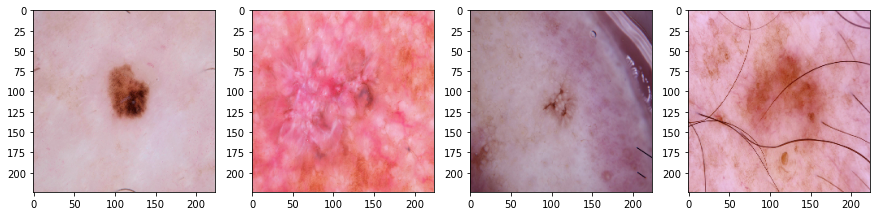

In [256]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(15,15))

test_generator_plot = test_datagen.flow_from_directory(
    test_directory,
    color_mode="rgb",
    batch_size=1,
    class_mode=None,
    shuffle=False,
    target_size=image_shape,
    seed=25
)

for i in range(4):

  # convert to unsigned integers for plotting
  image = (test_generator_plot)[i].astype('uint8')

  # changing size from (1, 200, 200, 3) to (200, 200, 3) for plotting the image
  image = np.squeeze(image)

  # plot raw pixel data
  ax[i].imshow(image)
#ax[i].axis('off')

In [276]:
def plot_image(i, pred_class, true_class):
    
    test_generator_plot = test_datagen.flow_from_directory(
    test_directory,
    color_mode="rgb",
    batch_size=1,
    class_mode=None,
    shuffle=False,
    target_size=image_shape,
    seed=25)
    
      # convert to unsigned integers for plotting
    image = (test_generator_plot)[i].astype('uint8')

    # changing size from (1, 200, 200, 3) to (200, 200, 3) for plotting the image
    image = np.squeeze(image)
    
  # predictions_array, true_label, img = predictions_array, true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(image)


    if pred_class == true_class:
        color = 'blue'
    else:
        color = 'red'

 #   plt.xlabel("{} {:2.0f}% ({})".format(class_names[pred_class],
  #                              100*np.max(pred_class_indices),
   #                             class_names[true_class]),
    #                            color=color)
    plt.xlabel(pred_class,color=color)
    
def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array, true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

Found 3005 images belonging to 7 classes.


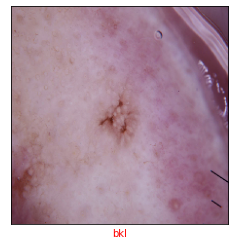

In [294]:
plot_image(2,pred_class[2],list(y_test.values)[2])

Found 3005 images belonging to 7 classes.
Found 3005 images belonging to 7 classes.


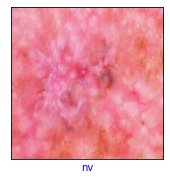

In [292]:
#plt.subplots(nrows=1, ncols=4, figsize=(15,15))
plt.figure(figsize=(6,3))
for i in range(2):
    plt.subplot(1,2,1)
    plot_image(i,pred_class[i],list(y_test.values)[i])

In [ ]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, pred_class[i], y_test.values, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()